In [30]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import pickle
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/pattern_recognition_project')

Mounted at /content/drive


In [32]:
from random_forest import train_tune_model, solver, add_ensemble, compute_metrics
from feature_extraction import create_all_features
from utils import load_svhn_dataset

# Tree based Methods

## Load the data and create Features

In [33]:
# Provide the paths to SVHN train and test datasets
#train_path = '/content/drive/MyDrive/pattern_recognition_project/train_32x32.mat'
#test_path = '/content/drive/MyDrive/pattern_recognition_project/test_32x32.mat'

train_path = 'train_32x32.mat'
test_path = 'test_32x32.mat'

train_images, train_labels, test_images, test_labels = load_svhn_dataset(train_path, test_path)

First the features are created. I calculate all the features from project 1. There we used 5 different feature extraction methods to create different features. For each of the five different techniques a separate random forest is going to be trained.

In [34]:
# the features from the different techniques are stored in a dictionary
features =  create_all_features(train_images, test_images)

feature for raw pixels created


100%|███████████████████████████████████| 26032/26032 [00:03<00:00, 8373.24it/s]


feature 1 created


100%|██████████████████████████████████| 26032/26032 [00:01<00:00, 23422.33it/s]


feature 2 created


100%|██████████████████████████████████| 26032/26032 [00:02<00:00, 11251.88it/s]


feature 3 created


100%|██████████████████████████████████| 26032/26032 [00:00<00:00, 54038.79it/s]


feature 4 created


100%|███████████████████████████████████| 26032/26032 [00:03<00:00, 7267.26it/s]

feature 5 created


Print the structure of the dictionary

In [29]:
for keys, items in features.items():
    dim = items['train'].shape
    print(f'Keys: {keys} --> contains {list(items.keys())}. Dimensions: {dim}')

Keys: raw_pixels --> contains ['train', 'test']. Dimensions: (73257, 3072)
Keys: rgb_histogram --> contains ['train', 'test']. Dimensions: (73257, 768)
Keys: gray_scaled --> contains ['train', 'test']. Dimensions: (73257, 256)
Keys: lbp --> contains ['train', 'test']. Dimensions: (73257, 64)
Keys: hcd --> contains ['train', 'test']. Dimensions: (73257, 64)
Keys: orb --> contains ['train', 'test']. Dimensions: (73257, 50)


## Decision Tree

In this section I fit a single decision tree on the train set using all the raw pixel values as well as all defined features in Phase 1 of the project. The hyperparameter are tuned using a GridSearch with Cross Validation. The performance is evaluated on the test set.

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model = DecisionTreeClassifier()
solver(model, features, train_labels, test_labels, cv=5, save_dir='results_dt')

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


 17%|███████                                   | 1/6 [12:18<1:01:33, 738.71s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


 33%|██████████████▋                             | 2/6 [12:34<20:54, 313.61s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


 50%|██████████████████████                      | 3/6 [12:41<08:40, 173.42s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


 67%|█████████████████████████████▎              | 4/6 [12:43<03:31, 105.70s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


 83%|█████████████████████████████████████▌       | 5/6 [12:44<01:08, 68.16s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


100%|████████████████████████████████████████████| 6/6 [12:45<00:00, 127.66s/it]


Read the predictions

In [37]:
df_preds_train = pd.read_csv('results_dt/train_preds.csv', index_col=0)
df_preds_test = pd.read_csv('results_dt/test_preds.csv', index_col=0)

In [38]:
df_preds_test.head(5)

,labels,raw_pixels,rgb_histogram,gray_scaled,lbp,hcd,orb
0,5,6,1,0,2,1,1
1,2,5,1,2,1,1,1
2,1,5,1,7,2,1,1
3,0,4,1,3,1,1,1
4,6,6,1,8,2,1,1


Now I create an ensemble made out all of the individual models. The classification is based on majority voting

In [162]:
#df_preds_train = add_ensemble(df_preds_train)
#df_preds_test = add_ensemble(df_preds_test)

calculate the train and test accuracy of the different models

In [39]:
df_results = compute_metrics(df_preds_train, df_preds_test)

add the validation accuracy from the cross validation

In [40]:
with open('results_dt/params.pkl', 'rb') as file:
    params = pickle.load(file)

val_acc = []
for keys, items in params.items():
    val_acc.append(items['val_acc'])

df_results.insert(1, 'val_acc', val_acc)
df_results = np.round(df_results, 3)

Performance results of decision tree on train, validation and test set.

In [41]:
df_results

,acc_train,val_acc,acc_test
raw_pixels,1.000,0.396,0.365
rgb_histogram,0.191,0.189,0.196
gray_scaled,1.000,0.392,0.385
lbp,0.265,0.221,0.236
hcd,0.199,0.197,0.210
orb,0.205,0.202,0.213


## Random Forest
In this section I fit a random forest on the train set using all the raw pixel values as well as all defined features in Phase 1 of the project. The hyperparameter are tuned using a GridSearch with Cross Validation. The performance is evaluated on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
solver(features, train_labels, test_labels, model = 'random_forest', save_dir='results_rf')

  0%|                                                     | 0/6 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


 17%|██████▏                              | 1/6 [5:39:10<28:15:53, 20350.61s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


 33%|████████████▋                         | 2/6 [6:00:02<10:07:44, 9116.22s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/louis.skowronek/miniforge3/envs/punctuation/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 50%|███████████████████▌                   | 3/6 [6:16:14<4:29:51, 5397.09s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/louis.skowronek/miniforge3/envs/punctuation/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 67%|██████████████████████████             | 4/6 [6:22:06<1:53:30, 3405.37s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/louis.skowronek/miniforge3/envs/punctuation/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
 83%|██████████████████████████████████▏      | 5/6 [6:33:15<40:18, 2418.89s/it]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/louis.skowronek/miniforge3/envs/punctuation/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
100%|█████████████████████████████████████████| 6/6 [6:39:03<00:00, 3990.63s/it]


## Read the predictions

In [212]:
df_preds_train = pd.read_csv('results_rf/train_preds.csv', index_col=0)
df_preds_test = pd.read_csv('results_rf/test_preds.csv', index_col=0)

In [213]:
df_preds_test.head(5)

,labels,raw_pixels,rgb_histogram,gray_scaled,lbp,hcd,orb
0,5,2,1,9,3,1,1
1,2,2,2,2,1,1,3
2,1,1,2,1,2,1,1
3,0,0,2,0,1,1,1
4,6,6,1,6,1,1,1


Now I create an ensemble made out all of the individual models. The classification is based on majority voting

In [162]:
#df_preds_train = add_ensemble(df_preds_train)
#df_preds_test = add_ensemble(df_preds_test)

calculate the train and test accuracy of the different models

In [214]:
df_results = compute_metrics(df_preds_train, df_preds_test)

add the validation accuracy from the cross validation

In [215]:
with open('results_rf/params.pkl', 'rb') as file:
    params = pickle.load(file)

val_acc = []
for keys, items in params.items():
    val_acc.append(items['val_acc'])

df_results.insert(1, 'val_acc', val_acc)
df_results = np.round(df_results, 3)

Performance results of decision tree on train, validation and test set.

In [217]:
df_results

,acc_train,val_acc,acc_test
raw_pixels,1.000,0.709,0.677
rgb_histogram,0.492,0.194,0.202
gray_scaled,1.000,0.711,0.693
lbp,0.773,0.274,0.290
hcd,0.241,0.205,0.217
orb,0.325,0.219,0.229


# Vision Tranformer

In this section I train a vision transformer from scratch to classify the the images

In [3]:
import torch
from torchvision import transforms
from model import VisionTransformer, load_weights, VisionTransformerPytorch, get_loader, show_batch
from solver import Solver, define_parser
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# define the configuration of the architecture of the model and training parameters
parser = define_parser()
args = parser.parse_args([
    "--epochs", "40",
    "--batch_size", "32",
    "--lr", "0.0001",
    "--n_classes", "10",
    "--img_size", "32",
    "--patch_size", "2",
    "--n_channels", "3",
    "--embed_dim", "128",
    "--n_attention_heads", "8",
    "--forward_mul", "4",
    "--n_layers", "6",
    "--dropout", "0.3",
    "--train_path", '/content/drive/MyDrive/pattern_recognition_project/train_32x32.mat',
    "--test_path", '/content/drive/MyDrive/pattern_recognition_project/test_32x32.mat',
    "--save_dir", '/content/drive/MyDrive/pattern_recognition_project/custom_vit_V1'
])

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VisionTransformer(args).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), args.lr)

transform = { 'train': transforms.Compose([transforms.ToTensor(),
                                          transforms.RandomAffine(degrees=15, translate=(0.0, 0.2), scale=(0.9, 1.1), shear=15),
                                          transforms.ColorJitter(brightness=0.3, contrast=0.3),
                                          #transforms.RandomRotation(15),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                          ]),
            'inference': transforms.Compose([transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                          ])
          }

dl_train, dl_test = get_loader(args, transform)

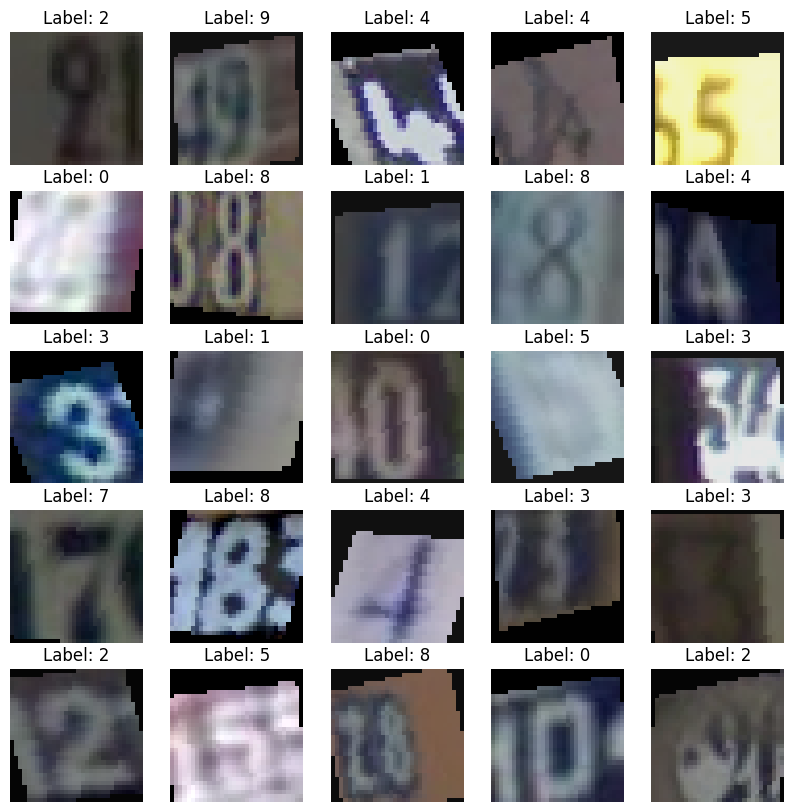

In [ ]:
show_batch(dl_train)

In [12]:
solver = Solver(model, criterion, optimizer, dl_train, dl_test, device, args)

100%|██████████| 2000/2000 [02:12<00:00, 15.08it/s]


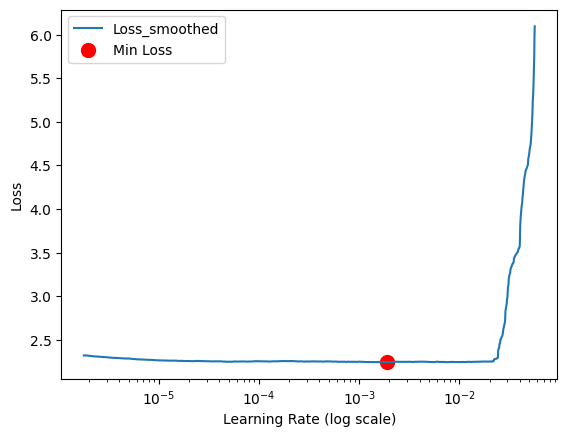

In [ ]:
# use a learning rate finder, to find a suitable learning rate
best_lr = solver.find_lr(init_lr=1e-6, final_lr=0.1, n_steps=2000, show_plot=True)

In [ ]:
best_lr

0.000189076832919664

In [ ]:
# train the model
solver.train(lr=best_lr)

,train_loss,valid_loss,train_acc,valid_acc,time
epochs,,,,,
1,2.242537,2.194337,0.187259,0.206976,141.481392
2,2.004403,1.564212,0.289037,0.44622,144.965004
3,1.682294,1.288424,0.409053,0.558697,143.940503
4,1.403347,1.004207,0.522558,0.66764,146.443081
5,1.207372,0.854014,0.594264,0.720306,146.384618
6,1.063857,0.763994,0.646628,0.751229,145.637014
7,0.962597,0.675638,0.681628,0.781922,141.2995
8,0.891496,0.629037,0.707468,0.798517,141.557495
9,0.837456,0.589069,0.727903,0.812462,141.869685


In [ ]:
results = pd.read_csv('/content/drive/MyDrive/pattern_recognition_project/custom_vit_V2/results.csv')

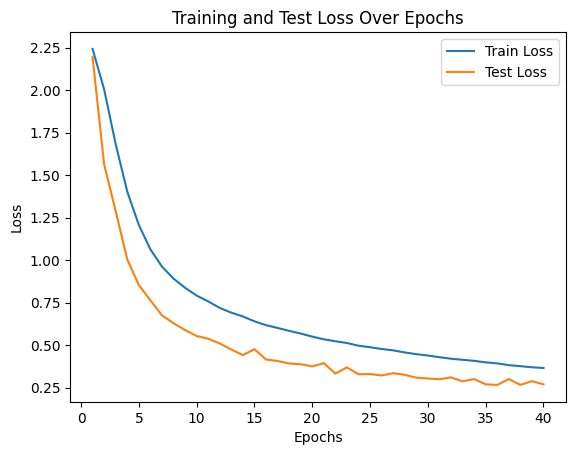

In [ ]:
# Plot the train_loss and test_loss
plt.plot(results['epochs'], results['train_loss'], label='Train Loss')
plt.plot(results['epochs'], results['valid_loss'], label='Test Loss')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# check predictions on the test set
solver.test()
print()
print(f'Loss on the test set is {solver.test_loss}. Accuracy on the test set is {solver.test_acc}')

making predictions: 100%|██████████| 814/814 [00:11<00:00, 73.77it/s]



Loss on the test set is 0.26965153217315674. Accuracy on the test set is 0.9185233558696988


## Train it for longer
It seems like there is still some room for improvement. I load the model from a checkpoint and train it for an additional 10 Epochs

In [43]:
# set a new directory for saving the new model
args.save_dir = '/content/drive/MyDrive/pattern_recognition_project/custom_vit_V2'

In [46]:
# load the model from the checkpoint
model = load_weights(model, '/content/drive/MyDrive/pattern_recognition_project/custom_vit_V1/best_model.pth')
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), args.lr)

Loading weigths


In [45]:
solver = Solver(model, criterion, optimizer, dl_train, dl_test, device, args)

100%|██████████| 100/100 [00:10<00:00,  9.45it/s]


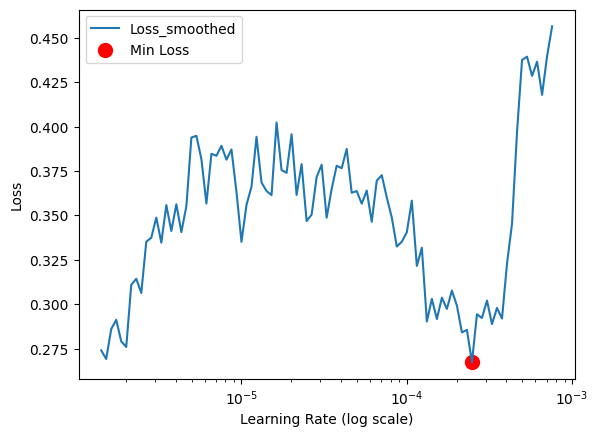

In [18]:
best_lr = solver.find_lr(init_lr=1e-6, final_lr=0.001, n_steps=100, show_plot=True)

In [37]:
best_lr

2.477076355991729e-05

In [35]:
solver.train(lr=best_lr)

,train_loss,valid_loss,train_acc,valid_acc,time
epochs,,,,,
1,0.306286,0.235699,0.905579,0.929471,235.431995
2,0.286099,0.23142,0.912841,0.931315,233.271244
3,0.282627,0.226887,0.91407,0.933505,233.721286
4,0.277898,0.223672,0.915271,0.93289,232.147244
5,0.272782,0.213111,0.916008,0.937308,231.996945
6,0.267331,0.22158,0.917919,0.934734,232.581545
7,0.262687,0.217058,0.919489,0.936463,232.209342
8,0.261635,0.235531,0.920062,0.931277,232.136067
9,0.260662,0.219392,0.919871,0.935118,232.07847


In [36]:
# report performance on test set
solver.test()
print()
print(f'Loss on the test set is {solver.test_loss}. Accuracy on the test set is {solver.test_acc}')

making predictions: 100%|██████████| 814/814 [00:21<00:00, 37.54it/s]


Loss on the test set is 0.22125018467206772. Accuracy on the test set is 0.9358481868469576


# Pretrained Convoluation Neural Network (ResNet)

could be trained as well, but i did not report the results for it

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.widgets import *
from fastai.vision.all import *
from fastai.callback.all import *
import os
from tqdm import tqdm

In [ ]:
# Provide the paths to SVHN train and test datasets
train_path = '/content/drive/MyDrive/pattern_recognition_project/train_32x32.mat'
test_path = '/content/drive/MyDrive/pattern_recognition_project/test_32x32.mat'

train_images, train_labels, test_images, test_labels = load_svhn_dataset(train_path, test_path)

In [7]:
# Create a directory to store the images
output_dir = "training_images"
os.makedirs(output_dir, exist_ok=True)

# Loop through the array, convert each image to a PIL image, and save it
for i in tqdm(range(len(train_images))):
    image = Image.fromarray((train_images[i]).astype(np.uint8))
    image.save(os.path.join(output_dir, f"image_{i}_{train_labels[i]}.png"))

100%|██████████| 73257/73257 [00:34<00:00, 2100.62it/s]


In [8]:
def label_func(fname):
    return str(fname).split('.')[0].split('_')[-1]

In [19]:
# create datablock
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = TrainTestSplitter(test_size=0.2,random_state=42),
                   item_tfms=Resize((32,32), method = ResizeMethod.Pad, pad_mode='zeros')
                   batch_tfms = aug_transforms(mult=2, pad_mode ='zeros', min_scale=0.8, xtra_tfms=[RandomErasing(p=.8, sh = 0.4, max_count=60)])
                   )

In [20]:
dls = dblock.dataloaders('/content/training_images', bs = 32)

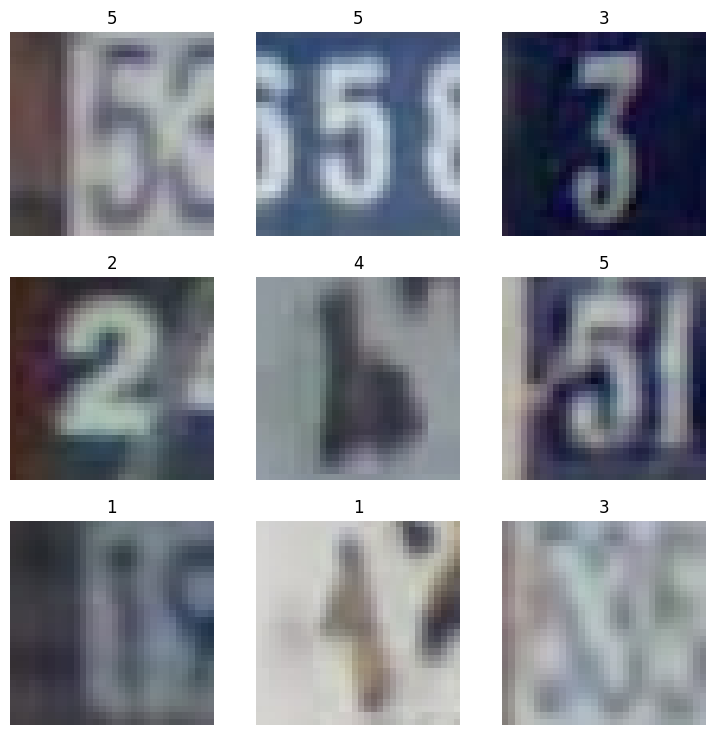

In [21]:
dls.show_batch()

In [16]:
parser = define_parser()
# Simulate command-line arguments in a notebook
args = parser.parse_args([
    "--epochs", "30",
    "--batch_size", "128",
    "--n_classes", "10",
    "--lr", "5e-4",
    "--img_size", "32",
    "--patch_size", "4",
    "--n_channels", "3",
    "--embed_dim", "96",
    "--n_attention_heads", "4",
    "--forward_mul", "2",
    "--n_layers", "6",
    "--train_path", '/content/drive/MyDrive/pattern_recognition_project/test_32x32.mat',
    "--test_path", '/content/drive/MyDrive/pattern_recognition_project/test_32x32.mat',
    "--transform", "custom",
])

In [25]:
learn = vision_learner(dls, models.resnet34, metrics=[accuracy, F1Score(average = 'weighted')])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 69.7MB/s]


Minimum/10: 2.57e-03, steepest point: 1.07e-04


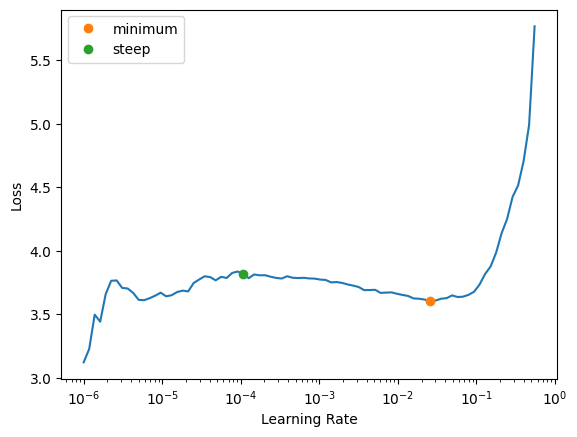

In [26]:
lr_valley, lr_min,lr_steep = learn.lr_find(start_lr = 1e-06, suggest_funcs=(valley, minimum, steep))
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(epochs = 30, base_lr = lr_valley, freeze_epochs=3)